In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-satisfaction-in-airline/Invistico_Airline.csv


**Part 2**

In this second part, I will be creating the Decision Tree for Invistico Airline.

The dataset comprises information about customers who have previously flown with the airline. It includes customer feedback across different contexts and flight-related data. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like you to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience

Additionally, the airline aims to determine which aspects of their services require more focus to enhance customer satisfaction and generate greater overall satisfaction among passengers.

**Logistic Regression Model**

The logistic regression model accurately predicted satisfaction 80.2% of the time in part 1.

In [25]:
# Import necessary libraries and packages
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load in the dataset
invistico= pd.read_csv('/kaggle/input/customer-satisfaction-in-airline/Invistico_Airline.csv')

In [4]:
# View the dataset
invistico.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [5]:
# Check data types
invistico.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [6]:
# 'Class' unique values
invistico['Class'].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [7]:
# Check for balance
invistico['satisfaction'].value_counts(dropna= False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [8]:
# Check for missing values
invistico.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
# Drop missing values
invistico= invistico.dropna(axis= 0).reset_index(drop= True)

In [11]:
# Confirm missing values are dropped
invistico.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [13]:
# Convert ordinal 'Class' column to numerical
invistico['Class']= invistico['Class'].map({'Business': 3, 'Eco Plus': 2, 'Eco':1})

In [14]:
# Represent target feature numerically
invistico['satisfaction']= invistico['satisfaction'].map({'satisfied': 1,'dissatisfied': 0})

In [15]:
# Convert other categorical columns to numerical
invistico= pd.get_dummies(invistico, drop_first= True)

In [16]:
# Check data types
invistico.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

In [17]:
# Set train and test data
y= invistico['satisfaction']
X= invistico.copy()
X= X.drop('satisfaction', axis= 1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25,random_state= 0)

In [18]:
# Decision tree
decision_tree= DecisionTreeClassifier(random_state= 0)
decision_tree.fit(X_train, y_train)
dt_pred= decision_tree.predict(X_test)

In [19]:
# Print scores
print('Decision Tree:')
print('Accuracy: ', '%.6f' % metrics.accuracy_score(y_test, dt_pred))
print('Precision: ', '%.6f' % metrics.precision_score(y_test, dt_pred))
print('Recall: ', '%.6f' % metrics.recall_score(y_test, dt_pred))
print('F1 Score: ', '%.6f' % metrics.f1_score(y_test, dt_pred))

Decision Tree:
Accuracy:  0.935438
Precision:  0.942859
Recall:  0.939030
F1 Score:  0.940940


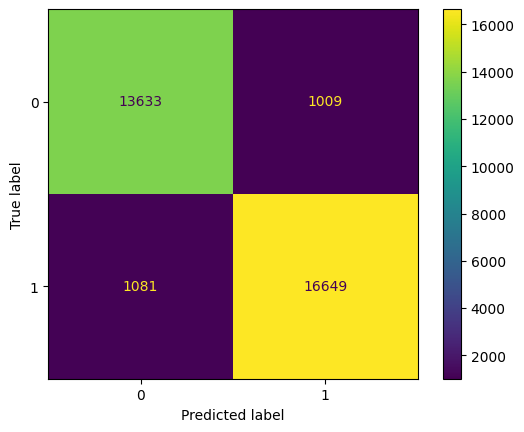

In [22]:
# Confusion Matrix
cm= confusion_matrix(y_test, dt_pred, labels= decision_tree.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= decision_tree.classes_)
disp.plot()

**Decision Tree Confusion Matrix**

There are a high proportion of true positives and true negatives in the confusion matrix (where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively).

The matrix also had a relatively low number of false positives and false negatives (where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.)

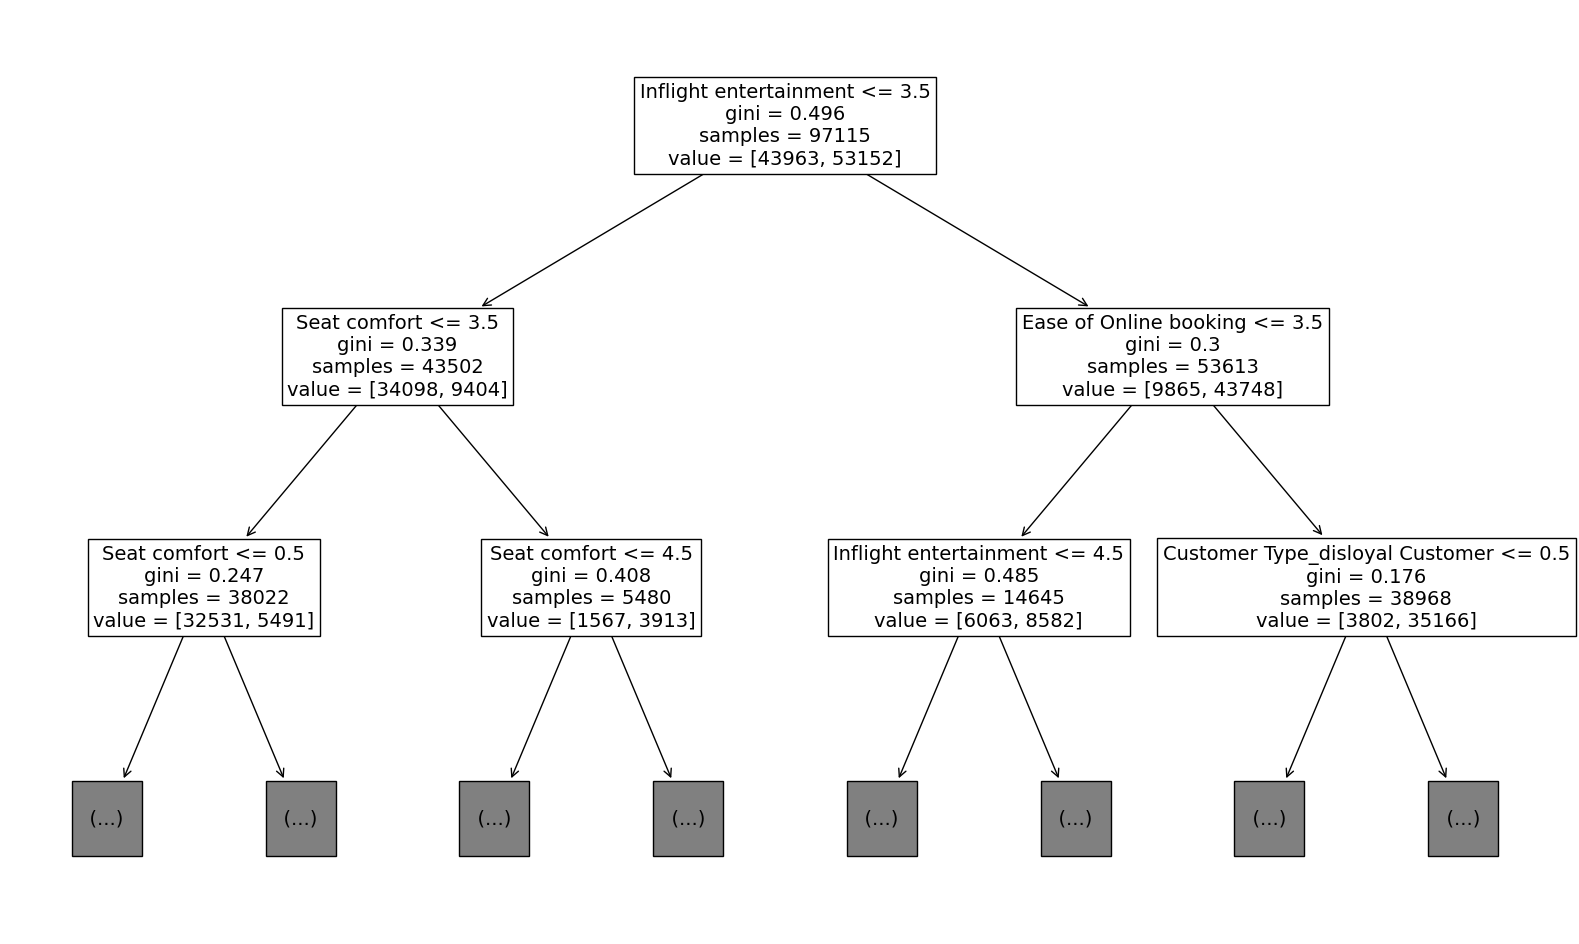

In [26]:
# Plot decision tree
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth= 2, fontsize= 14, feature_names= X.columns)
plt.show()

<Axes: title={'center': 'Decision Tree Feature Importances'}, ylabel='Feature Importances'>

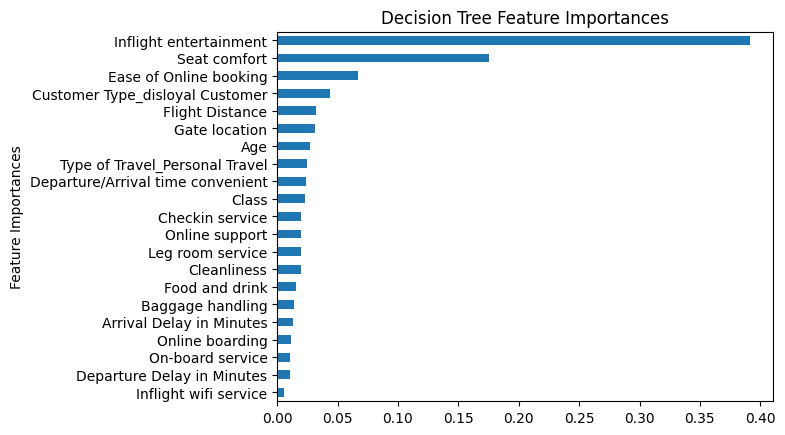

In [29]:
# Calculate feature importances
importances= decision_tree.feature_importances_
tree_importances= pd.Series(importances, index= X.columns).sort_values(ascending= True)

fix,ax= plt.subplots()
ax.set_xlabel('Feature Names')
ax.set_ylabel('Feature Importances')
ax.set_title('Decision Tree Feature Importances')
tree_importances.plot.barh(ax=ax)


In [32]:
# Hyperparameter tuning
tree_params= {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring= {'accuracy', 'precision', 'recall', 'f1'}

In [33]:
%%time
# Tuned decision tree
tuned_tree= DecisionTreeClassifier(random_state= 0)
clf= GridSearchCV(tuned_tree, tree_params, scoring= scoring, cv= 5, refit= 'f1')
clf.fit(X_train, y_train)

CPU times: user 13min 53s, sys: 98.2 ms, total: 13min 53s
Wall time: 13min 54s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'accuracy', 'f1', 'recall', 'precision'})

In [34]:
# Best combination of values for hyperparameters
clf.best_estimator_

DecisionTreeClassifier(max_depth=18, min_samples_leaf=2, random_state=0)

In [36]:
# Validation score
print('Best Avg. Validation Score: ', '%.3f' % clf.best_score_)

Best Avg. Validation Score:  0.945


In [39]:
# Print results
results= pd.DataFrame(columns= ['Model', 'Precision', 'Accuracy', 'Recall', 'F1'])

def get_results(model_name, model_object):
    cv_results= pd.DataFrame(model_object.cv_results_)
    best_estimator_results= cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    precision= best_estimator_results.mean_test_precision
    accuracy= best_estimator_results.mean_test_accuracy
    recall= best_estimator_results.mean_test_recall
    f1= best_estimator_results.mean_test_f1
    
    table= pd.DataFrame({'Model': [model_name],
                         'Precision': [precision],
                         'Accuracy': [accuracy],
                         'Recall': [recall],
                         'F1': [f1]
                        })
    return table

result_table= get_results('Tuned Decsion Tree', clf)
result_table

,Model,Precision,Accuracy,Recall,F1
0,Tuned Decsion Tree,0.955197,0.940864,0.935863,0.945422


**Scores**

The F1 score for the decision tree that was not hyperparameter tuned is 94.1% and the F1 score for the hyperparameter-tuned decision tree is 94.5%. While ensuring that overfitting doesn’t occur is necessary for some models, it didn’t make a meaningful difference in improving this model.

[Text(0.5, 0.875, 'Inflight entertainment <= 3.5\ngini = 0.496\nsamples = 97115\nvalue = [43963, 53152]'),
 Text(0.25, 0.625, 'Seat comfort <= 3.5\ngini = 0.339\nsamples = 43502\nvalue = [34098, 9404]'),
 Text(0.125, 0.375, 'Seat comfort <= 0.5\ngini = 0.247\nsamples = 38022\nvalue = [32531, 5491]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Seat comfort <= 4.5\ngini = 0.408\nsamples = 5480\nvalue = [1567, 3913]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Ease of Online booking <= 3.5\ngini = 0.3\nsamples = 53613\nvalue = [9865, 43748]'),
 Text(0.625, 0.375, 'Inflight entertainment <= 4.5\ngini = 0.485\nsamples = 14645\nvalue = [6063, 8582]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Customer Type_disloyal Customer <= 0.5\ngini = 0.176\nsamples = 38968\nvalue = [3802, 35166]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),


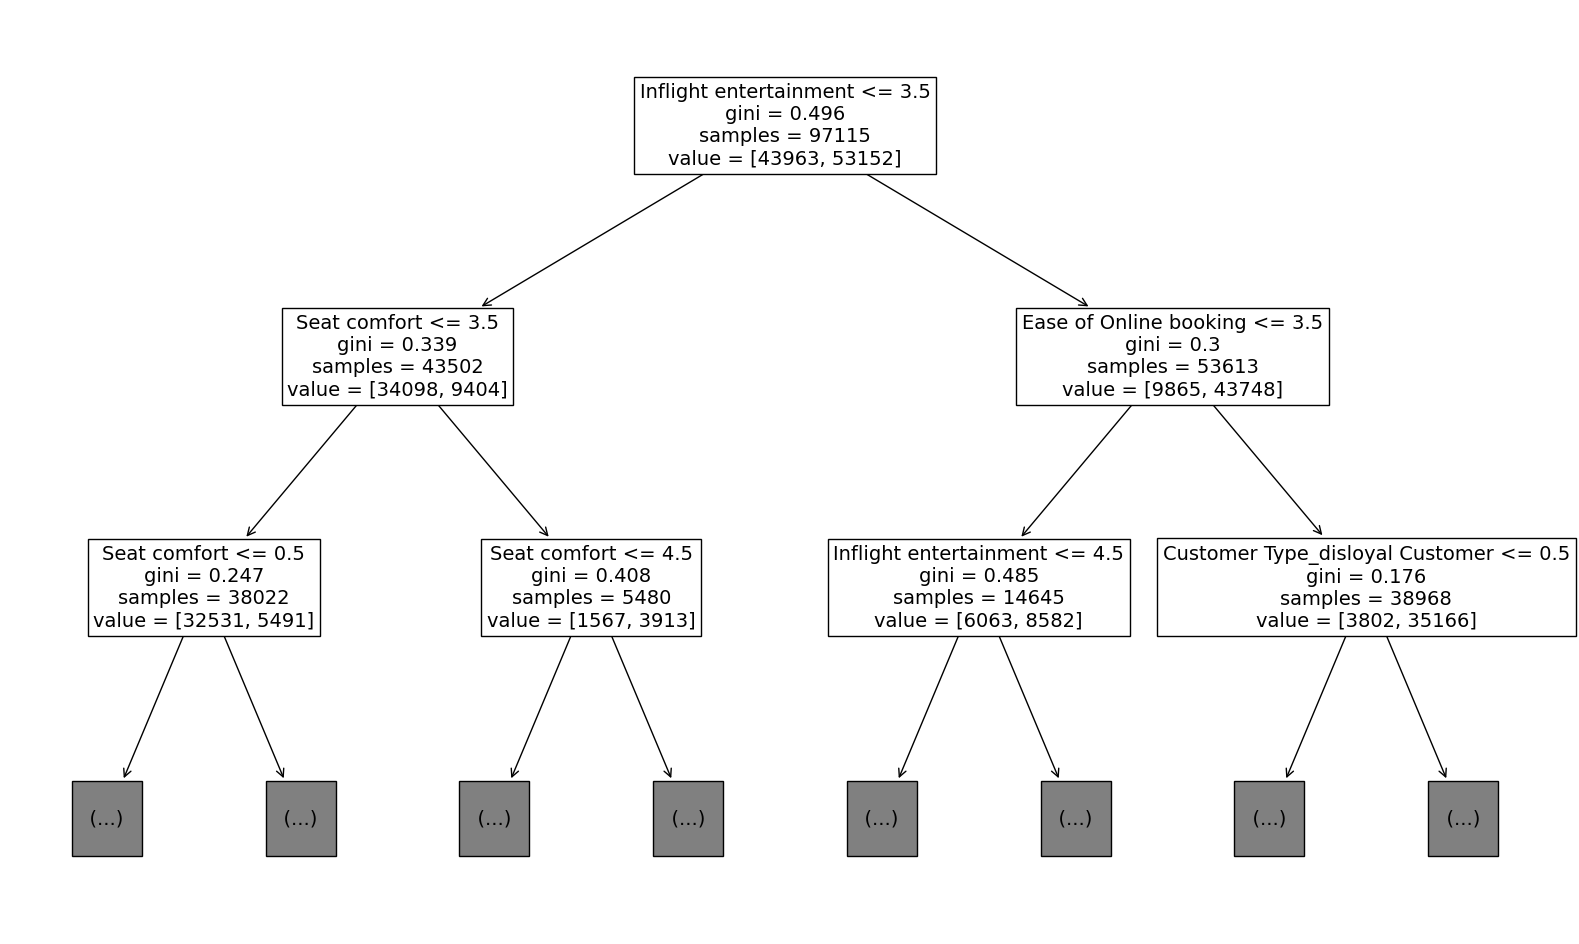

In [40]:
# Plot tuned tree
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth= 2, fontsize= 14, feature_names= X.columns)

<Axes: title={'center': 'Tuned Decision Tree Feature Importances'}, ylabel='Feature Importances'>

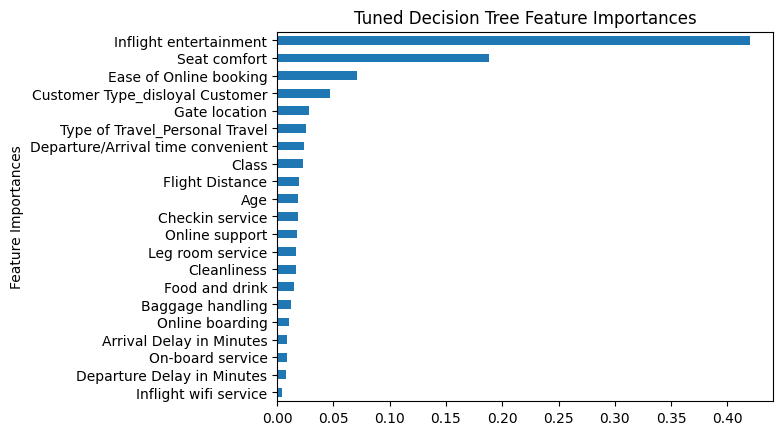

In [41]:
# Building another feature importance graph to validate most important features
importances= clf.best_estimator_.feature_importances_
tunedtree_importances= pd.Series(importances, index= X.columns).sort_values(ascending= True)

fix,ax= plt.subplots()
ax.set_xlabel('Feature Names')
ax.set_ylabel('Feature Importances')
ax.set_title('Tuned Decision Tree Feature Importances')
tunedtree_importances.plot.barh(ax=ax)

**Conclusion**

The feature importance graph seems to confirm that ‘Inflight entertainment’, ‘Seat comfort’ and ‘Ease of Online booking’ are the “most important” features for this model.

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reasons why each metric is important:

Accuracy tends to be the metric that the stakeholders can best understand.

Precision measures what proportion of predicted positives is truly positive. For example, if you wanted to not falsely claim a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn.

Recall measures the percentage of actual positives a model correctly identified (true positive). For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer.

F1 balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

**Recommendation to Stakeholders**

Customer satisfaction is highly tied to ‘Inflight entertainment’, ‘Seat comfort’, and ‘Ease of Onlinebooking’. Improving these experiences should lead to better customer satisfaction.

The success of the model suggests that the airline should invest more effort into model building and model understanding since this model seemed to be very good at predicting customer satisfaction.